In [1]:
# implement gradient descent!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

X: d,n

y: n,

w: d,

In [7]:
def mu(w,b,X,y,penalty):
    ''' n, '''
    return 1/(1+np.exp(-y*(b+X.T@w)))

In [154]:
def J(w,b,X,y,penalty):
    _,n=X.shape    
    return -np.sum(np.log(mu(w,b,X,y,penalty)))/n + penalty*np.sum(np.square(w))

In [155]:
def grad_w_J(w,b,X,y,penalty):
    ''' d, '''
    d,n = X.shape
    mu_i = mu(w,b,X,y,penalty)
    return (1/n)*np.einsum('n,n,dn->d',(1-mu_i),-y, X) + 2*penalty*w

In [156]:
def hess_w_J(w,b,X,y,penalty):
    ''' d,d '''
    d,n = X.shape
    mu_i = mu(w,b,X,y,penalty)
    return (1/n)*np.einsum('n,n,kn,ln->kl',-mu_i*(1-mu_i), np.square(y), X, X) + 2*penalty*np.identity(d)

In [157]:
def grad_b_J(w,b,X,y,penalty):
    d,n = X.shape
    mu_i = mu(w,b,X,y,penalty)
    return -y@(1-mu_i)/n 

In [158]:
def hess_b_J(w,b,X,y,penalty):
    d,n = X.shape
    mu_i = mu(w,b,X,y,penalty)
    return np.sum(-y*y*mu_i*(1-mu_i))/n 

## Load Data

In [159]:
from mnist import MNIST

In [160]:
mndata = MNIST(r'./data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

In [161]:
keep_train = np.bitwise_or(labels_train==2, labels_train==7)
keep_test = np.bitwise_or(labels_test==2, labels_test==7)

In [162]:
X_train_27 = X_train[keep_train]
labels_train_27 = labels_train[keep_train].astype(int)
X_test_27 = X_test[keep_test]
labels_test_27 = labels_test[keep_test].astype(int)

In [163]:
labels_train_27[labels_train_27==2]=-1
labels_train_27[labels_train_27==7]=1
labels_test_27[labels_test_27==2]=(-1)
labels_test_27[labels_test_27==7]=1

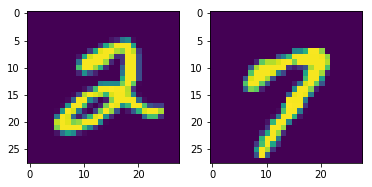

In [164]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_train_27[0].reshape([28,28]))
ax[1].imshow(X_train_27[1].reshape([28,28]))

## Part 1: Gradient descent

In [165]:
X = X_train_27.T # d,n
d,n = X.shape
y = labels_train_27
w0 = np.zeros(d)
b0 = 0
penalty0 = 0.1

In [166]:
def gradient_descent(w0,b0,X,y,penalty,learn_rate,max_iterations):
    results = np.zeros(int(max_iterations))
    wi = np.zeros([int(max_iterations),len(w0)])
    bi = np.zeros(int(max_iterations))
    wi[0] = w0
    bi[0] = b0
    results[0] = J(w0,b0,X,y,penalty)
    i = 0
    while i < max_iterations-1:
        i = i+1
        wi[i] = wi[i-1] - learn_rate*grad_w_J(wi[i-1],bi[i-1],X,y,penalty)
        bi[i] = bi[i-1] - learn_rate*grad_b_J(wi[i-1],bi[i-1],X,y,penalty)
        results[i] = J(wi[i],bi[i],X,y,penalty)
        # We can add various exit conditions...
        if cap and (results[i] > results[i-1]):
            results[i+1:] = np.nan
            bi[i+1:] = np.nan
            wi[i+1:,:] = np.nan
            break
    return wi,bi,results,i

In [230]:
learn_rate = 0.05
max_iter = 200
train_w,train_b,train_J,_ = gradient_descent(w0,b0,X,y,penalty0,learn_rate,max_iter,cap=False)
test_J = np.array([J(w,b,X_test_27.T,labels_test_27,penalty0) for w,b in zip(train_w,train_b)])

In [231]:
def class_error(w,b,X,y):
    d,n = X.shape
    classified_x = b+X.T@w > 0
    known_labels = y == 1
    return np.sum(~(classified_x==known_labels)/n)

In [232]:
test_error = [class_error(w, b, X_test_27.T, labels_test_27) for w,b in zip(train_w,train_b)]
train_error = [class_error(w, b, X_train_27.T, labels_train_27) for w,b in zip(train_w,train_b)]

In [245]:
def make_q5_plots(train_J, test_J, test_error, train_error, arbitrary_xmax):
    fig,ax = plt.subplots(1,2,figsize=[12,5])

    ax[0].plot(np.arange(len(train_J)), train_J)
    ax[0].plot(np.arange(len(test_J)),test_J)
    ax[0].legend(['Test J','Train J'], fontsize=18)
    ax[0].set_xlim([-1,arbitrary_xmax]);
    ax[0].set_ylabel('J(w,b)',fontsize=18)
    ax[0].set_xlabel('Iteration',fontsize=18)

    ax[1].plot(np.arange(len(test_error)), test_error)
    ax[1].plot(np.arange(len(train_error)),train_error)
    ax[1].legend(['Test J','Train J'], fontsize=18)
    ax[1].set_xlim([-1,arbitrary_xmax]);
    ax[1].set_ylabel('Misclass. error',fontsize=18)
    ax[1].set_xlabel('Iteration',fontsize=18)
    return fig,ax

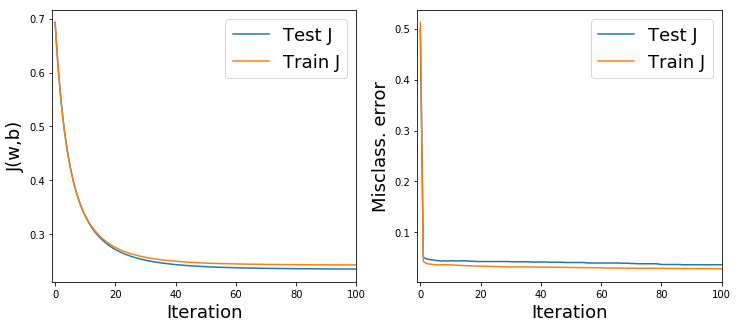

In [254]:
fig, ax = make_q5_plots(train_J, test_J, test_error, train_error, 100)
fig.savefig(r'./figs/gd.png')

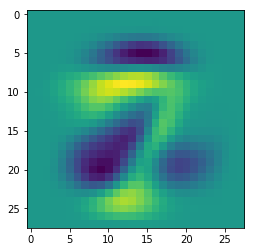

In [111]:
plt.imshow(w1[1].reshape([28,28]))

## Part 2: Stochastic gradient descent
### Batch size = 1
something something rescale

In [227]:
def stochastic(function,w,b,x,y,penalty,batch):
    subsetX = X[:,batch]
    subsetY = y[batch]
    return function(w,b,subsetX,subsetY,penalty)

In [220]:
def stochastic_gradient_descent(w0,b0,X,y,penalty,learn_rate,max_iterations,batch_size):
    results = np.zeros(int(max_iterations))
    wi = np.zeros([int(max_iterations),len(w0)])
    bi = np.zeros(int(max_iterations))
    wi[0] = w0
    bi[0] = b0
    results[0] = J(w0,b0,X,y,penalty)
    i = 0
    while i < max_iterations-1:
        i = i+1
        batch = np.random.randint(0,len(y),batch_size)
        wi[i] = wi[i-1] - learn_rate*stochastic(grad_w_J,wi[i-1],bi[i-1],X,y,penalty,batch)
        bi[i] = bi[i-1] - learn_rate*stochastic(grad_b_J,wi[i-1],bi[i-1],X,y,penalty,batch)
        results[i] = J(wi[i],bi[i],X,y,penalty)
        
    return wi,bi,results

In [228]:
learn_rate = 0.05
max_iter = 100
size = 1

sg_train_w1,sg_train_b1,sg_train_J1 = stochastic_gradient_descent(w0,b0,X,y,penalty0,learn_rate,max_iter,size)
sg_test_J1 = np.array([J(w,b,X_test_27.T,labels_test_27,penalty0) for w,b in zip(sg_train_w1,sg_train_b1)])

In [246]:
sg1_test_error = [class_error(w, b, X_test_27.T, labels_test_27) for w,b in zip(sg_train_w1,sg_train_b1)]
sg1_train_error = [class_error(w, b, X_train_27.T, labels_train_27) for w,b in zip(sg_train_w1,sg_train_b1)]

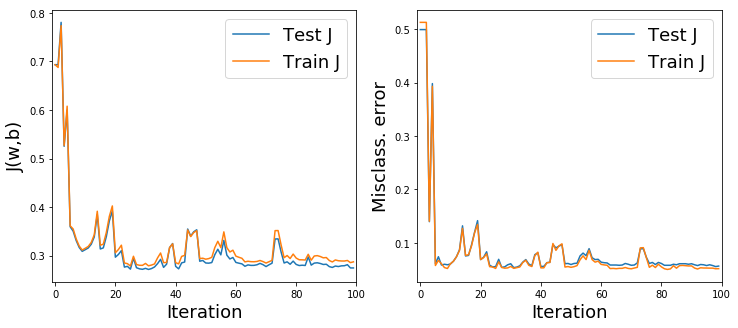

In [252]:
fig, ax = make_q5_plots(sg_train_J1, sg_test_J1,sg1_test_error,sg1_train_error,100)
fig.savefig(r'./figs/sgd_bs1.png')

### Batch size = 100

In [225]:
learn_rate = 0.05
max_iter = 100
size = 100

sg_train_w100,sg_train_b100,sg_train_J100 = stochastic_gradient_descent(w0,b0,X,y,penalty0,
                                                                        learn_rate,max_iter,size)
sg_test_J100 = np.array([J(w,b,X_test_27.T,labels_test_27,penalty0) for w,b in zip(sg_train_w100,sg_train_b100)])

In [249]:
sg100_test_error = [class_error(w, b, X_test_27.T, labels_test_27) for w,b in zip(sg_train_w100,sg_train_b100)]
sg100_train_error = [class_error(w, b, X_train_27.T, labels_train_27) for w,b in zip(sg_train_w100,sg_train_b100)]

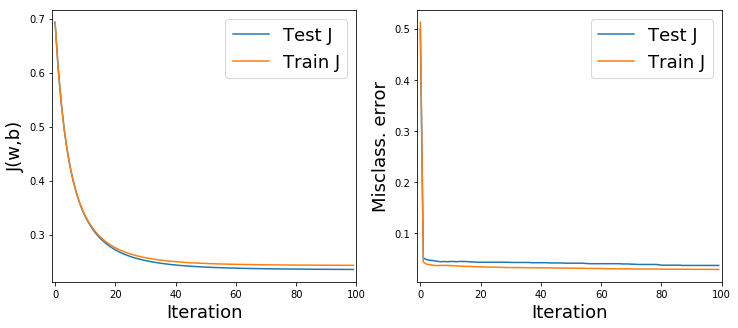

In [251]:
fig, ax = make_q5_plots(sg_train_J100, sg_test_J100, sg100_test_error, sg100_train_error, 100)
fig.savefig(r'./figs/sgd_bs100.png')

## Part 3: Newton's Method

In [243]:
def newton_gradient_descent(w0,b0,X,y,penalty,learn_rate,max_iterations):
    results = np.zeros(int(max_iterations))
    wi = np.zeros([int(max_iterations),len(w0)])
    bi = np.zeros(int(max_iterations))
    wi[0] = w0
    bi[0] = b0
    results[0] = J(w0,b0,X,y,penalty)
    i = 0
    while i < max_iterations-1:
        i = i+1
        mv_w = np.linalg.solve(a=hess_w_J(wi[i-1],bi[i-1],X,y,penalty),
                               b=-grad_w_J(wi[i-1],bi[i-1],X,y,penalty))
        mv_b = -hess_b_J(wi[i-1],bi[i-1],X,y,penalty)/hess_b_J(wi[i-1],bi[i-1],X,y,penalty)
        wi[i] = wi[i-1] + learn_rate*mv_w
        bi[i] = bi[i-1] + learn_rate*mv_b
        results[i] = J(wi[i],bi[i],X,y,penalty)
        
    return wi,bi,results

In [244]:
learn_rate = 0.05
max_iter = 10

n_train_w,n_train_b,n_train_J = newton_gradient_descent(w0,b0,X,y,penalty0,learn_rate,max_iter)
n_test_J = np.array([J(w,b,X_test_27.T,labels_test_27,penalty0)
                     for w,b in zip(n_train_w,n_train_b)])

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [255]:
n_test_error = [class_error(w, b, X_test_27.T, labels_test_27) for w,b in zip(n_train_w,n_train_b)]
n_train_error = [class_error(w, b, X_train_27.T, labels_train_27) for w,b in zip(n_train_w,n_train_b)]

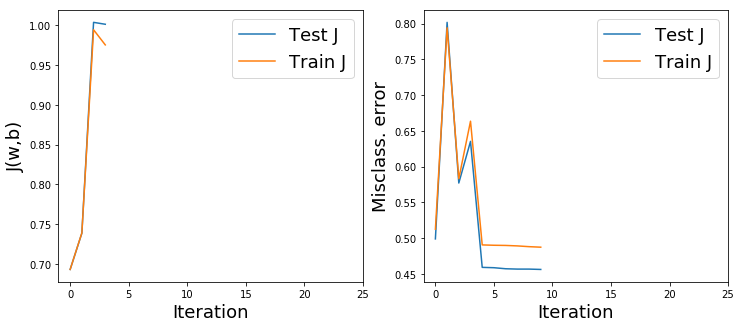

In [257]:
fig,ax = make_q5_plots(n_train_J, n_test_J, n_test_error, n_train_error, arbitrary_xmax)
fig.savefig(r'./figs/ngd.png')

## Practice here: